# Import Packages and Load Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, seed, choice
import pandas as pd
import os
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings("ignore")

# set random seed 
seed(42)

sns.set_style('ticks', rc={"xtick.direction": "in", "ytick.direction": "in", "xtick.top":True,"ytick.right":True})
%matplotlib inline

In [2]:
''' data directories '''

datadir = '../datasets/raw'
datadir_pr = '../datasets/processed'

In [3]:
nyc_air = pd.read_csv(os.path.join(datadir,'air_quality','nyc.csv'))
yahoo = pd.read_csv(os.path.join(datadir,'stock_data','yahoo.csv'), parse_dates=['date'], index_col='date')
co = pd.read_csv(os.path.join(datadir,'air_quality','co_cities.csv'), parse_dates=['date'], index_col='date')
google = pd.read_csv(os.path.join(datadir,'stock_data','google.csv'), parse_dates=['Date'], index_col='Date')

prices_asset = pd.read_csv(os.path.join(datadir,'stock_data','asset_classes.csv'), parse_dates=['DATE'], index_col='DATE')

nyse = pd.read_csv(os.path.join(datadir,'stock_data','nyse.csv'), parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(os.path.join(datadir,'stock_data','dow_jones.csv'), parse_dates=['date'], index_col='date')

msft_aapl = pd.read_csv(os.path.join(datadir,'stock_data','msft_aapl.csv'), parse_dates=['date'], index_col='date')
sp500 = pd.read_csv(os.path.join(datadir,'stock_data','sp500.csv'), parse_dates=['date'], index_col='date')

debt = pd.read_csv(os.path.join(datadir,'stock_data','debt_unemployment.csv'), parse_dates=['date'], index_col='date')

ozone_nyla = pd.read_csv(os.path.join(datadir,'air_quality','ozone_nyla.csv'), parse_dates=['date'], index_col='date')
ozone_nyc  = pd.read_csv(os.path.join(datadir,'air_quality','ozone_nyc.csv'), parse_dates=['date'], index_col='date')

google_fb = pd.read_csv(os.path.join(datadir,'stock_data','goog_fb.csv'), parse_dates=['date'], index_col='date')

gdp_growth = pd.read_csv(os.path.join(datadir,'stock_data','gdp_growth.csv'), parse_dates=['date'], index_col='date')
djia = pd.read_csv(os.path.join(datadir,'stock_data','djia.csv'), parse_dates=['date'], index_col='date')

apple_google = pd.read_csv(os.path.join(datadir,'stock_data','apple_google.csv'), parse_dates=['Date'], index_col='Date')

fb = pd.read_csv(os.path.join(datadir,'stock_data','fb.csv'), parse_dates=True, index_col=0, header=None).squeeze()
fb.index.names = ['date']

stock5 = pd.read_csv(os.path.join(datadir,'stock_data','5_stocks.csv'), parse_dates=['Date'], index_col='Date')

stock_prices = pd.read_csv(os.path.join(datadir,'stock_data','market_cap_series.csv'), parse_dates=['Date'], index_col='Date')

In [4]:
listings = pd.read_csv(os.path.join(datadir_pr,'listings.csv'),index_col=0)
unemploy = pd.read_csv(os.path.join(datadir_pr,'unemployment.csv'), parse_dates=['date'], index_col='date')

# Working w/ Time Series

In [5]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', freq='D', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


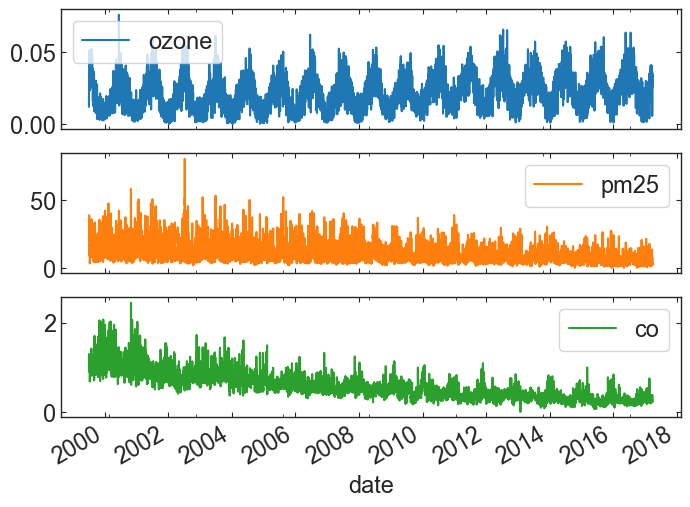

In [6]:
# Inspect data
print(nyc_air.info())

# Convert the date column to datetime64
nyc_air.date = pd.to_datetime(nyc_air.date)

# Set date column as index
nyc_air.set_index('date', inplace=True)

# Inspect data 
print(nyc_air.info())

# Plot data
nyc_air.plot(subplots=True);

## Compare annual stock price trend

- read yahoo price data and create separate annul data

In [7]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


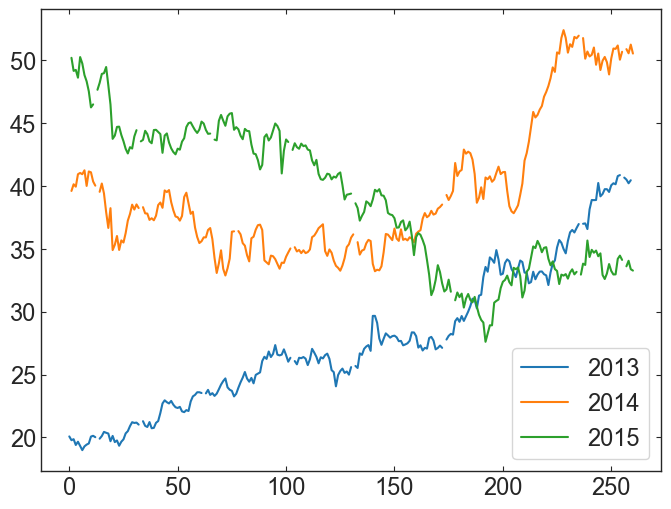

In [8]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot();

In [9]:
prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


## Set and change time series frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2005-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 68.5 KB
None


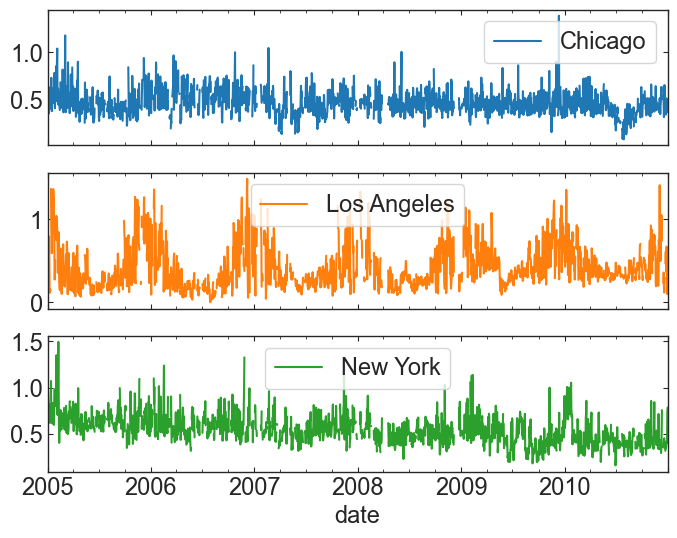

In [10]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co_day = co.asfreq('D')

print(co_day.info())
# Plot the data
co_day.plot(subplots=True);

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-01-31 to 2010-12-31
Freq: M
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      68 non-null     float64
 1   Los Angeles  68 non-null     float64
 2   New York     68 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB
None


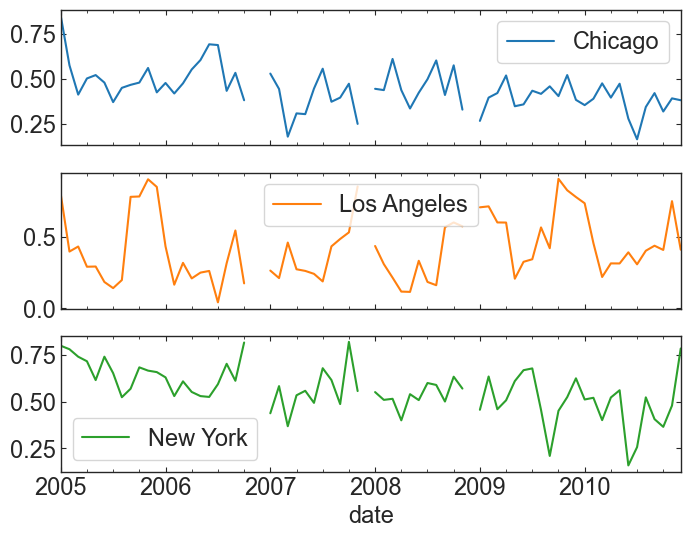

In [11]:
# Set frequency to monthly
co_month = co.asfreq('M')

print(co_month.info())
# Plot the data
co_month.plot(subplots=True);

## Shift time series

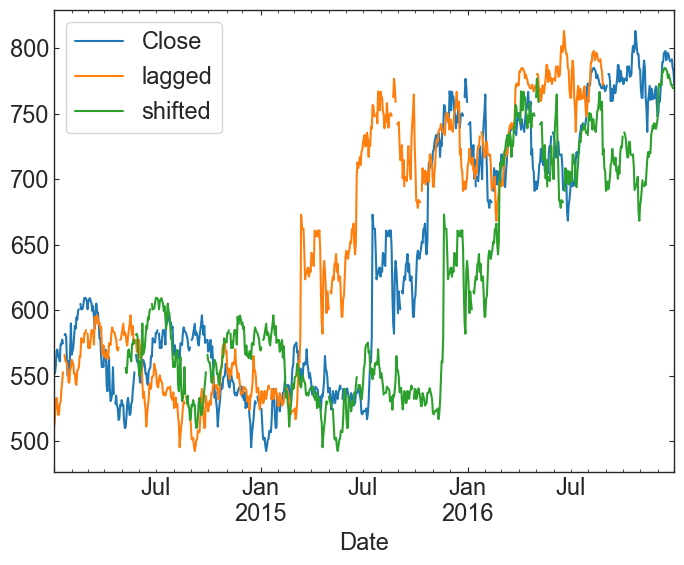

In [12]:
# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series
google.plot();

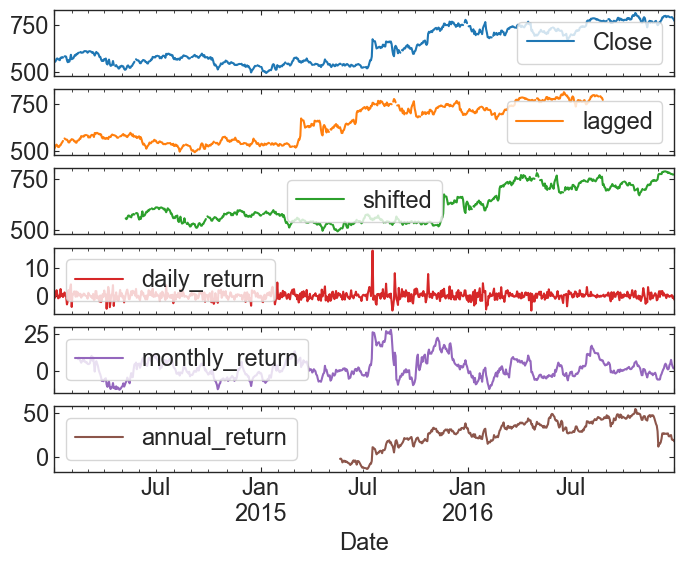

In [13]:
''' Multi-period returns '''

# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True);

# Basic Time Series Metrics & Resampling

- One can easily compare several time series by normalizing their starting points to 100, and plot the result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


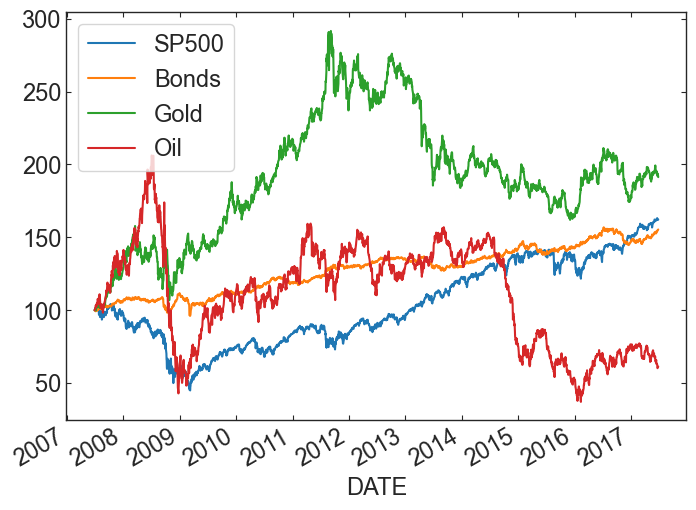

In [14]:
# Inspect prices here
print(prices_asset.info())

# Select first prices
first_prices = prices_asset.iloc[0]

# Create normalized
normalized = prices_asset.div(first_prices).mul(100)

# Plot normalized
normalized.plot();

## Comparing stock prices

In [15]:
nyse.head(3)

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02


In [16]:
dow_jones.head(3)

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


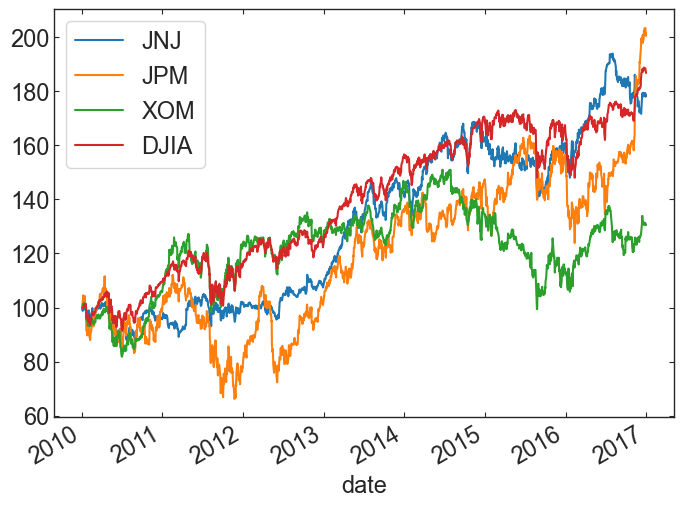

In [17]:
# Concatenate data and inspect result here
data = pd.concat([nyse, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot();

In [18]:
msft_aapl.head(3)

,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64


In [19]:
sp500.head(3)

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87


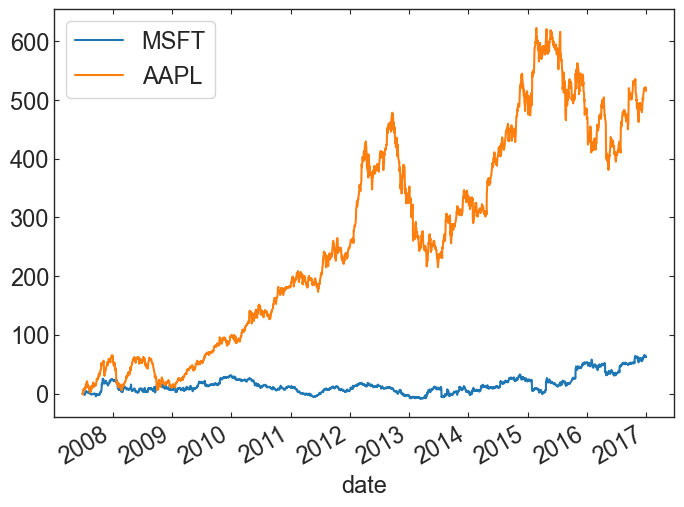

In [20]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Concatenate stocks and index here
data = pd.concat([msft_aapl, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized.SP500, axis=0).plot();

## Change the freqeuncy: Resampling

In [21]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly data

In [22]:
unemploy.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


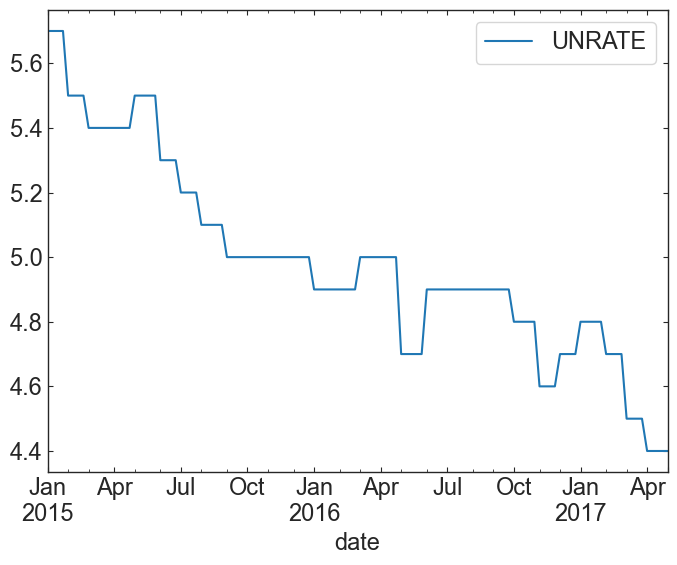

In [23]:
# Show first five rows of weekly series
print(unemploy.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(unemploy.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = unemploy.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot();

### Interpolation to cerate weekly employment data

In [24]:
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [25]:
monthly = unemploy.loc['2010':'2017-01-01']

monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


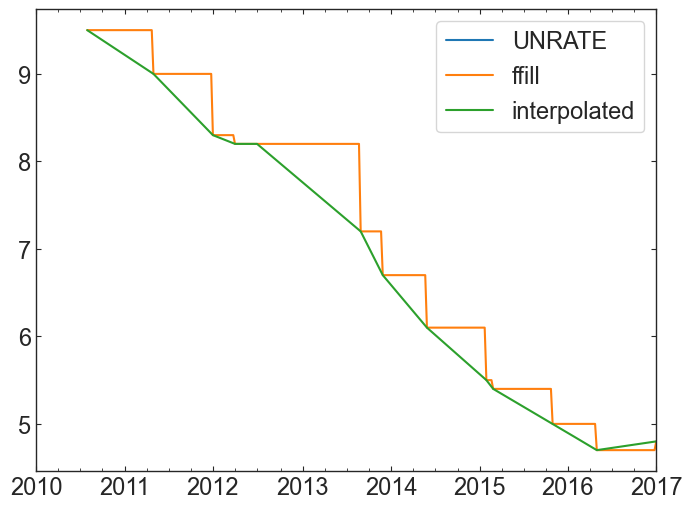

In [26]:
# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot();

In [27]:
debt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


In [28]:
debt.head()

,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


<AxesSubplot:xlabel='date'>

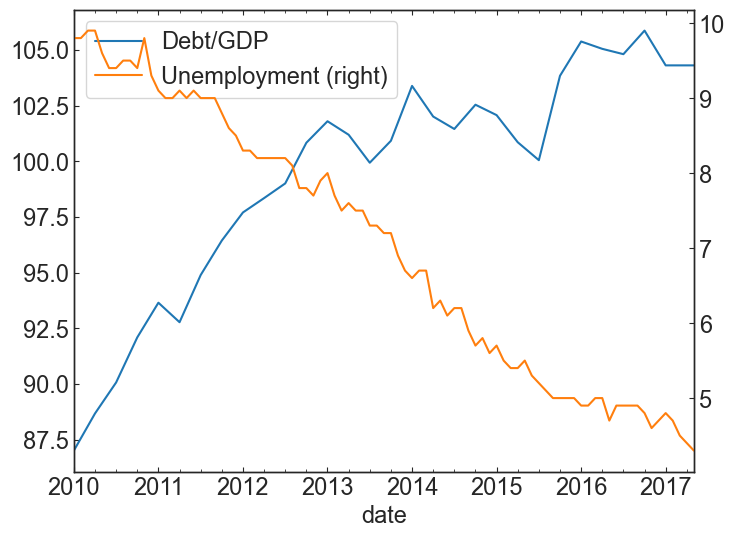

In [29]:
# Interpolate and inspect here
interpolated = debt.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')

## Downsampling

In [30]:
ozone_nyla.head()

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


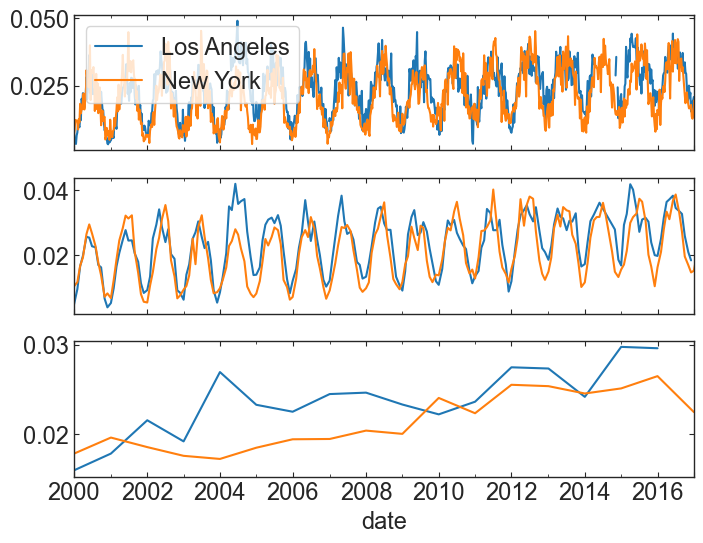

In [31]:
# Calculate and plot the weekly average ozone trend

fig, axes = plt.subplots(3,1, sharex=True)
ozone_nyla.resample('W').mean().plot(ax=axes[0])
# Calculate and plot the monthly average ozone trend
ozone_nyla.resample('M').mean().plot(ax=axes[1], legend=False)
# Calculate and plot the annual average ozone trend
ozone_nyla.resample('A').mean().plot(ax=axes[2], legend=False);

In [32]:
google_fb.head()

,FB,GOOG
date,,
2015-01-02,78.45,524.81
2015-01-05,77.19,513.87
2015-01-06,76.15,501.96
2015-01-07,76.15,501.10
2015-01-08,78.18,502.68


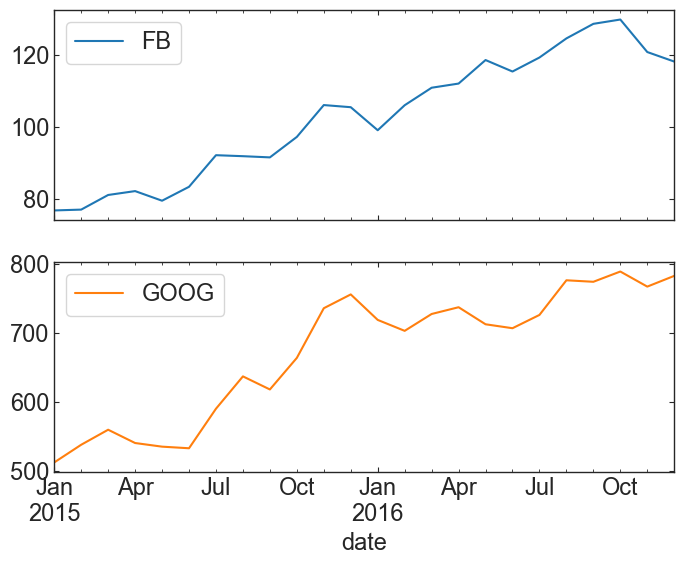

In [33]:
# Calculate and plot the monthly averages
monthly_average = google_fb.resample('M').mean()
monthly_average.plot(subplots=True);

### Compare Quarterly GDP grwoth rate and stock return

In [34]:
gdp_growth.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [35]:
djia.head()

,djia
date,
2007-06-29,13408.62
2007-07-02,13535.43
2007-07-03,13577.30
2007-07-04,NaN
2007-07-05,13565.84


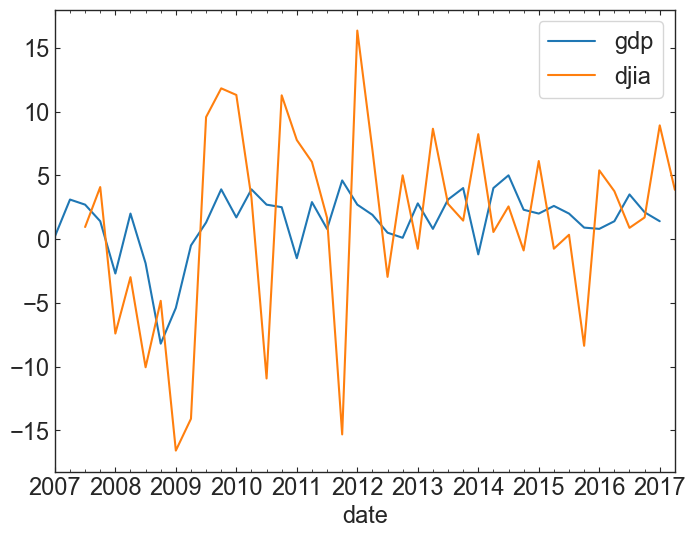

In [36]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot();

### Monthly mean, median and standard deviation 

In [37]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 102.0 KB


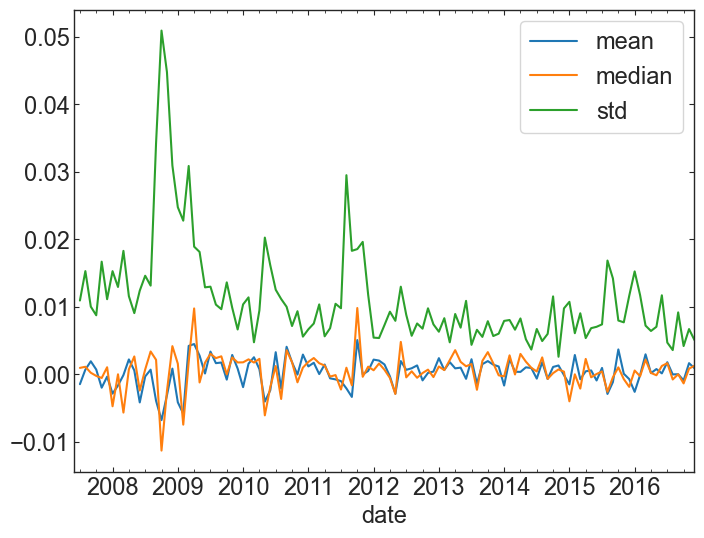

In [38]:
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()  # squeeze(): DataFrame to Series

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot();

# Window Functions: Rolling & Expanding Metrics

In [39]:
ozone_nyc.dropna(inplace=True)
ozone_nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 96.4 KB


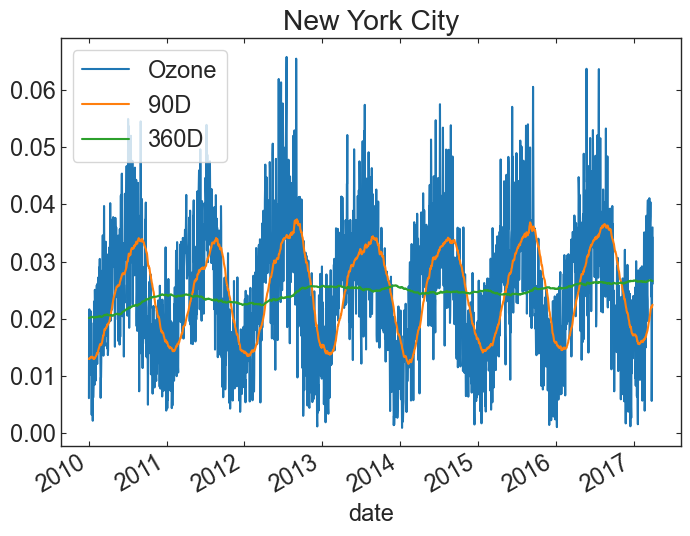

In [40]:
# Calculate 90d and 360d rolling mean for the last price
ozone_nyc['90D']  = ozone_nyc.Ozone.rolling('90D').mean()
ozone_nyc['360D'] = ozone_nyc.Ozone.rolling('360D').mean()

# Plot data
ozone_nyc.loc['2010':].plot(title='New York City');

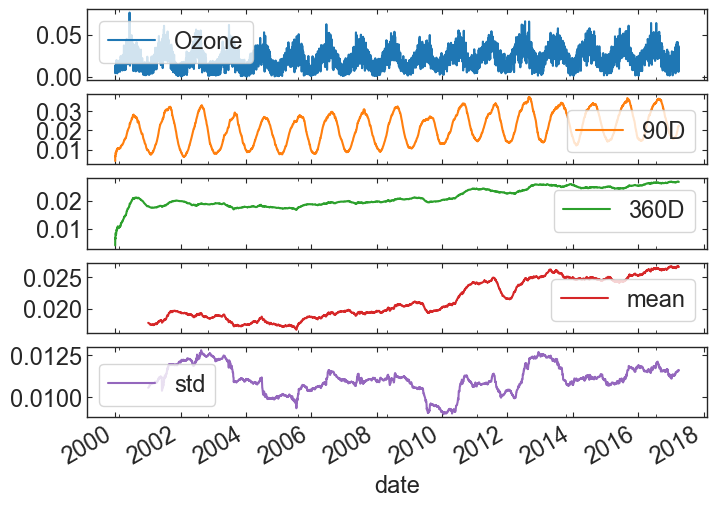

In [41]:
# Calculate the rolling mean and std here
rolling_stats = ozone_nyc.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = ozone_nyc.join(rolling_stats)

# Plot stats
stats.plot(subplots=True);

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
 1   90D     6300 non-null   float64
 2   360D    6300 non-null   float64
dtypes: float64(3)
memory usage: 196.9 KB


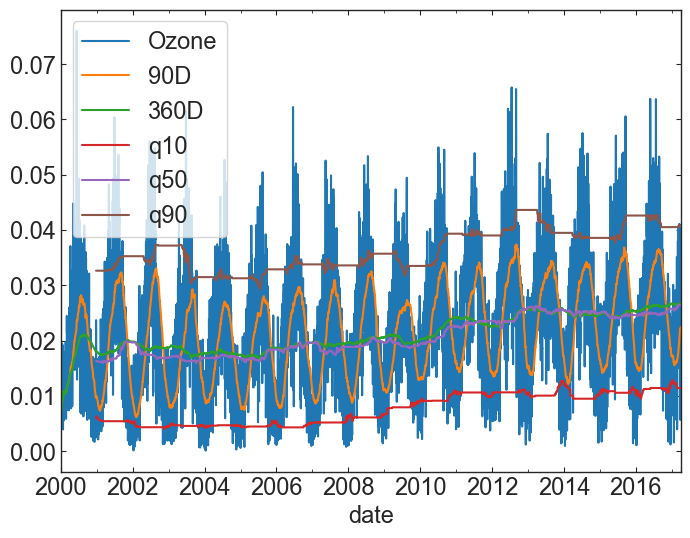

In [42]:
# Resample, interpolate and inspect ozone data here
data = ozone_nyc.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot();

### Cumulative sum vs. .diff()

In [43]:
google.dropna(inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 299 entries, 2015-05-21 to 2016-08-26
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           299 non-null    float64
 1   lagged          299 non-null    float64
 2   shifted         299 non-null    float64
 3   daily_return    299 non-null    float64
 4   monthly_return  299 non-null    float64
 5   annual_return   299 non-null    float64
dtypes: float64(6)
memory usage: 16.4 KB


In [44]:
# Calculate differences
differences = google.diff().dropna()

# Select start price
start_price = google.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(google.equals(cumulative_sum))

False


### Cumulative return
- .pct_change: daily return ->  r_t = P_t / P_(t-1) - 1
- multi-period return: R_t = (r_t + 1) (r_(t+1) + 1) ... (r_(t+n) + 1) -1

In [45]:
apple_google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1864 entries, 2010-01-04 to 2017-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1624 non-null   float64
 1   GOOG    1864 non-null   float64
dtypes: float64(2)
memory usage: 43.7 KB


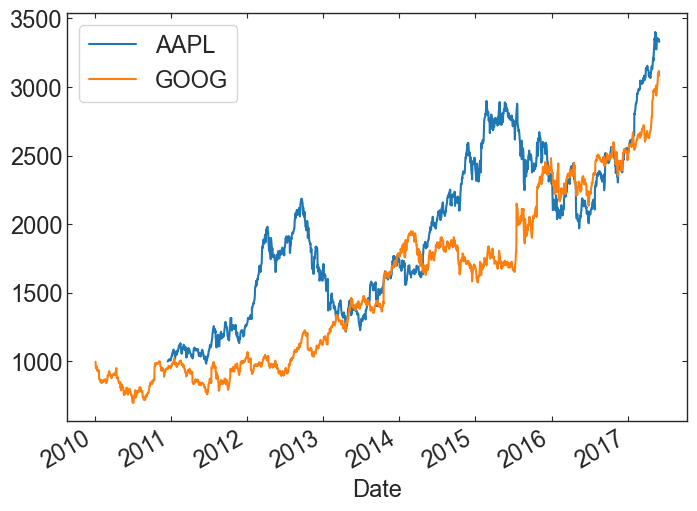

In [46]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = apple_google.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot();

### Cumulative return with rolling windows

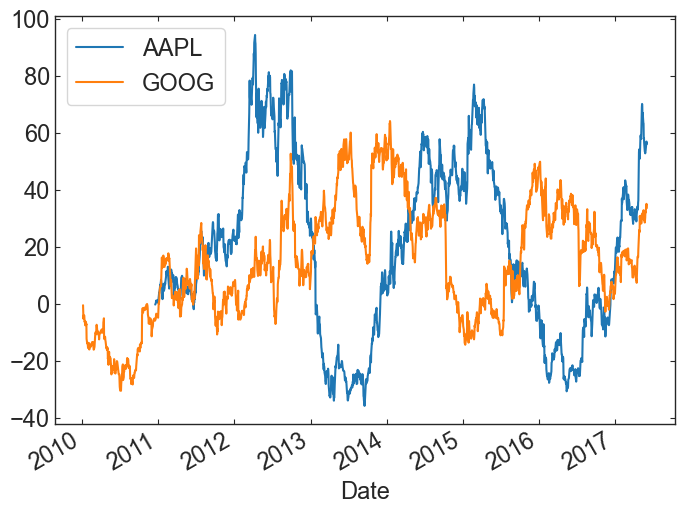

In [47]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = apple_google.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();

## Random Walk

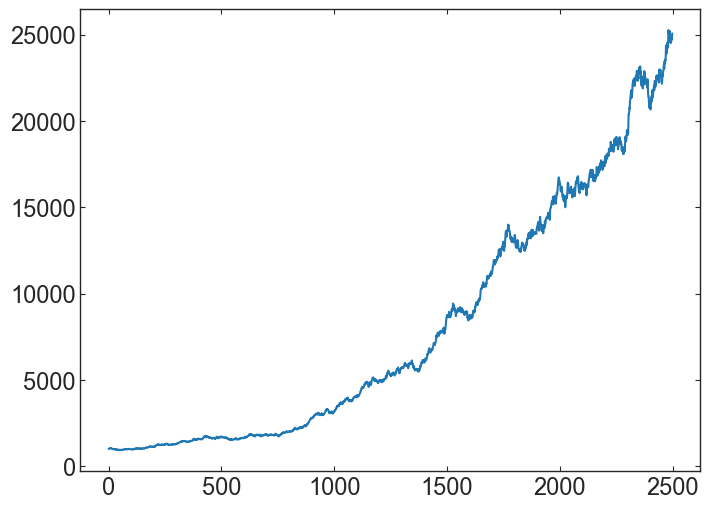

In [48]:
# Create random_walk
random_walk = normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot();

In [49]:
fb.head()

date
2012-05-17    38.00
2012-05-18    38.23
2012-05-21    34.03
2012-05-22    31.00
2012-05-23    32.00
Name: 1, dtype: float64

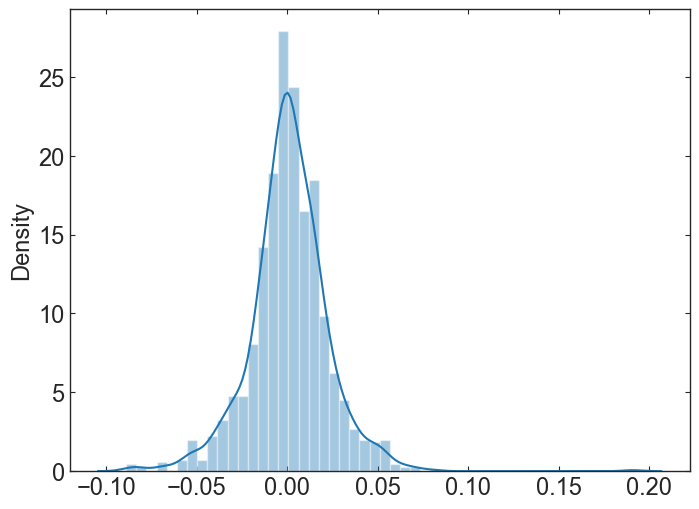

In [50]:
# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk);

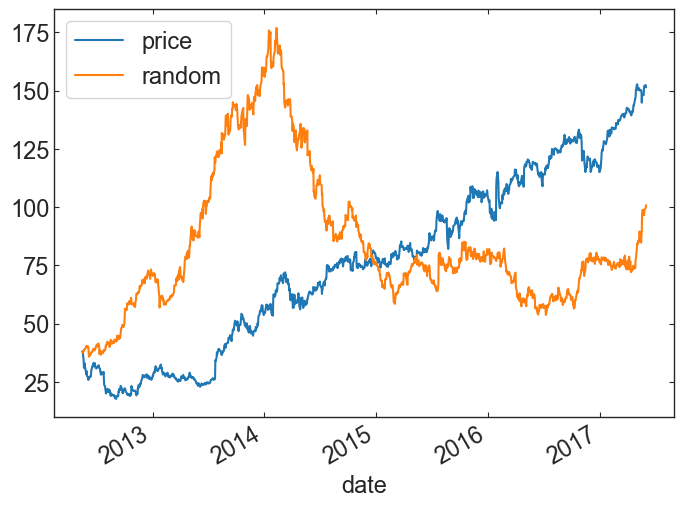

In [51]:
fb_df = fb.to_frame(name='price')

# Select fb start price here
start = fb_df.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# synchronize the index
random_price.set_axis(fb_df.index, inplace=True)  

# Insert into fb and plot
fb_df['random'] = random_price
fb_df.plot();

## Correlation between series

In [52]:
stock5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB


          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


<AxesSubplot:>

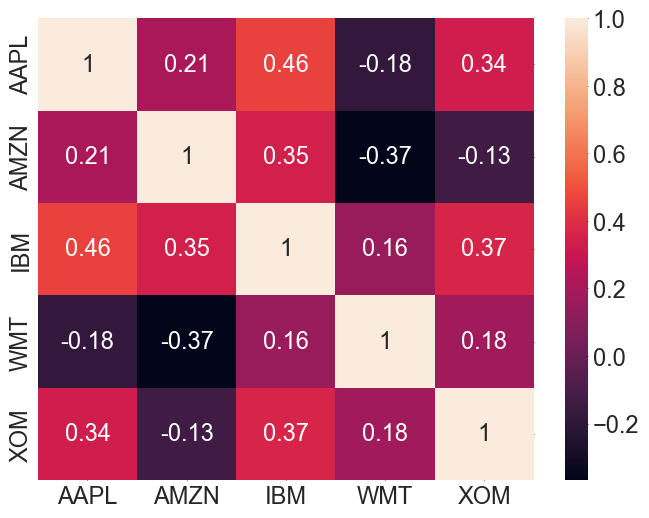

In [53]:
# Calculate year-end prices here
annual_prices = stock5.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)

# Putting it all together: Building a value-weighted index

In [54]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               6674 non-null   object 
 1   Stock Symbol           6674 non-null   object 
 2   Company Name           6674 non-null   object 
 3   Last Sale              6590 non-null   float64
 4   Market Capitalization  6674 non-null   float64
 5   IPO Year               2852 non-null   float64
 6   Sector                 5182 non-null   object 
 7   Industry               5182 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


In [55]:
listings.head()

,Exchange,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,amex,XXII,"22nd Century Group, Inc",1.3300,120.628490,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,amex,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1266.332595,1986.0,NaN,NaN
2,amex,IAF,Aberdeen Australia Equity Fund Inc,6.1500,139.865305,NaN,NaN,NaN
3,amex,CH,"Aberdeen Chile Fund, Inc.",7.2201,67.563458,NaN,NaN,NaN
4,amex,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,128.842972,NaN,NaN,NaN


In [56]:
# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings.loc[listings['IPO Year'] < 2019,:]

In [57]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   Last Sale              2349 non-null   float64
 3   Market Capitalization  2349 non-null   float64
 4   IPO Year               2349 non-null   float64
 5   Sector                 2349 non-null   object 
 6   Industry               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 146.8+ KB


In [58]:
# Show the number of companies per sector
listings.groupby(['Sector']).size().sort_values(ascending=False)

Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Basic Industries         104
Public Utilities         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Consumer Durables         55
dtype: int64

In [59]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
components.sort_values(ascending=False)

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Miscellaneous          BABA            275525.000000
Health Care            AMGN            118927.210535
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Energy                 PAA              22223.001416
Consumer Durables      CPRT             13620.922869
Name: Market Capitalization, dtype: float64

In [60]:
# Select stock symbols and print the result
tickers = components.index.get_level_values("Stock Symbol")
print(tickers)

Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [61]:
# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
listings.loc[tickers, info_cols].sort_values(by='Market Capitalization', ascending=False)

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
AAPL,Apple Inc.,740024.467000,141.05
AMZN,"Amazon.com, Inc.",422138.530626,884.67
BABA,Alibaba Group Holding Limited,275525.000000,110.21
AMGN,Amgen Inc.,118927.210535,161.61
UPS,"United Parcel Service, Inc.",90180.886756,103.74
GS,"Goldman Sachs Group, Inc. (The)",88840.590477,223.32
ABEV,Ambev S.A.,88240.198455,5.62
RIO,Rio Tinto Plc,70431.476895,38.94
TEF,Telefonica SA,54609.806092,10.84


In [62]:
stock_prices.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,160386.7278,42475.580670,63893.145750,2090.225938,8892.669154,68854.242342,4469.465,28476.143688,19531.934838,101342.466626,143829.332465,50575.708420
2010-01-05,160701.5202,42107.635585,64270.110538,2090.225938,8859.692631,70071.563705,4440.205,28398.521801,19748.956336,102916.051241,143728.576365,50662.638135
2010-01-06,158130.7156,41791.202811,63105.814231,2081.038131,8885.341038,69323.666920,4713.786,28343.077596,19741.722286,106063.220471,142217.234868,50288.840359
2010-01-07,157815.9232,41408.539922,62032.180340,2067.256422,8998.926841,70680.224387,4794.251,28154.567299,19502.998638,106081.307650,139799.088473,49906.349611
2010-01-08,158865.2312,41776.485008,63711.820915,2076.444228,9035.567423,69343.557792,4849.845,28165.656140,19568.105088,107256.974316,138892.283574,52305.609756


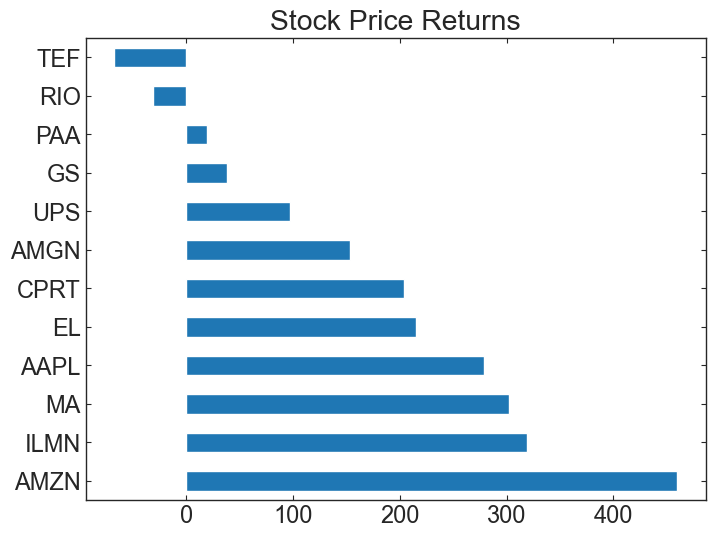

In [63]:
# Calculate the returns
#price_return = stock_prices.pct_change().mul(100)
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values(ascending=False).plot(title='Stock Price Returns', kind='barh');

## value-weighted index:

- calculate the number of shares for each index component

In [64]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   Last Sale              2349 non-null   float64
 3   Market Capitalization  2349 non-null   float64
 4   IPO Year               2349 non-null   float64
 5   Sector                 2349 non-null   object 
 6   Industry               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 211.4+ KB
None
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [65]:
# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
components.head()

,Market Capitalization,Last Sale
Stock Symbol,,
RIO,70431.476895,38.94
GM,50086.335099,33.39
CPRT,13620.922869,29.65
ABEV,88240.198455,5.62
AMZN,422138.530626,884.67


In [66]:
# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
no_shares.sort_values(ascending=False)

Stock Symbol
ABEV    15701.102928
AAPL     5246.540000
TEF      5037.804990
BABA     2500.000000
RIO      1808.717948
GM       1500.039985
UPS       869.297154
AMGN      735.890171
PAA       723.404994
AMZN      477.170618
CPRT      459.390316
GS        397.817439
dtype: float64

In [67]:
stock_prices.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,160386.7278,42475.580670,63893.145750,2090.225938,8892.669154,68854.242342,4469.465,28476.143688,19531.934838,101342.466626,143829.332465,50575.708420
2010-01-05,160701.5202,42107.635585,64270.110538,2090.225938,8859.692631,70071.563705,4440.205,28398.521801,19748.956336,102916.051241,143728.576365,50662.638135
2010-01-06,158130.7156,41791.202811,63105.814231,2081.038131,8885.341038,69323.666920,4713.786,28343.077596,19741.722286,106063.220471,142217.234868,50288.840359
2010-01-07,157815.9232,41408.539922,62032.180340,2067.256422,8998.926841,70680.224387,4794.251,28154.567299,19502.998638,106081.307650,139799.088473,49906.349611
2010-01-08,158865.2312,41776.485008,63711.820915,2076.444228,9035.567423,69343.557792,4849.845,28165.656140,19568.105088,107256.974316,138892.283574,52305.609756


In [68]:
no_shares

Stock Symbol
RIO      1808.717948
GM       1500.039985
CPRT      459.390316
ABEV    15701.102928
AMZN      477.170618
PAA       723.404994
GS        397.817439
AMGN      735.890171
BABA     2500.000000
TEF      5037.804990
AAPL     5246.540000
UPS       869.297154
dtype: float64

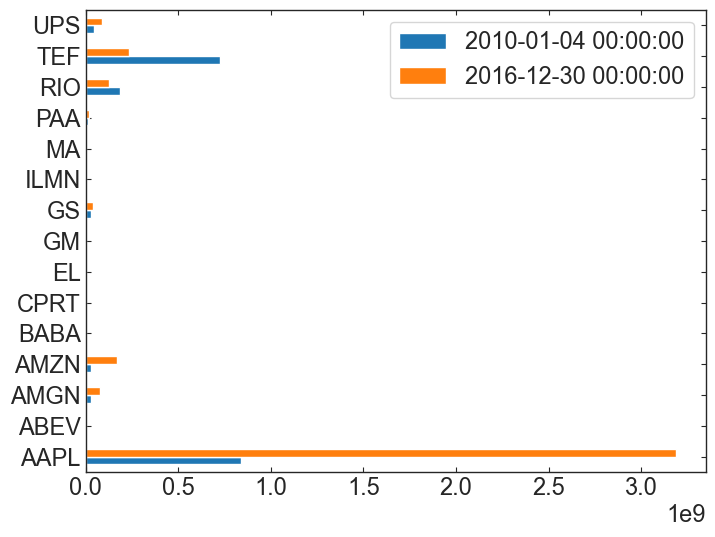

In [69]:
# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh');

Date
2010-01-04    1.897551e+09
2010-01-05    1.902167e+09
2010-01-06    1.885338e+09
2010-01-07    1.870771e+09
2010-01-08    1.876512e+09
                  ...     
2016-12-23    3.964059e+09
2016-12-27    3.987345e+09
2016-12-28    3.971437e+09
2016-12-29    3.970855e+09
2016-12-30    3.941658e+09
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.243266
2010-01-06     99.356350
2010-01-07     98.588689
2010-01-08     98.891229
                 ...    
2016-12-23    208.903924
2016-12-27    210.131083
2016-12-28    209.292761
2016-12-29    209.262080
2016-12-30    207.723386
Length: 1762, dtype: float64


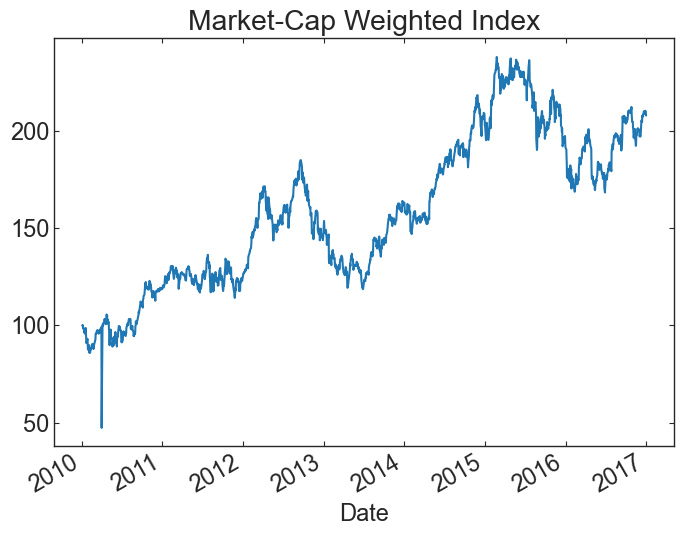

In [70]:
# Aggregate and print the market cap per trading day
raw_index = market_cap.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index');

## Evaluate

In [71]:
# Calculate and print the index return here
index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
weights.sort_values()

107.72338560113664


Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64

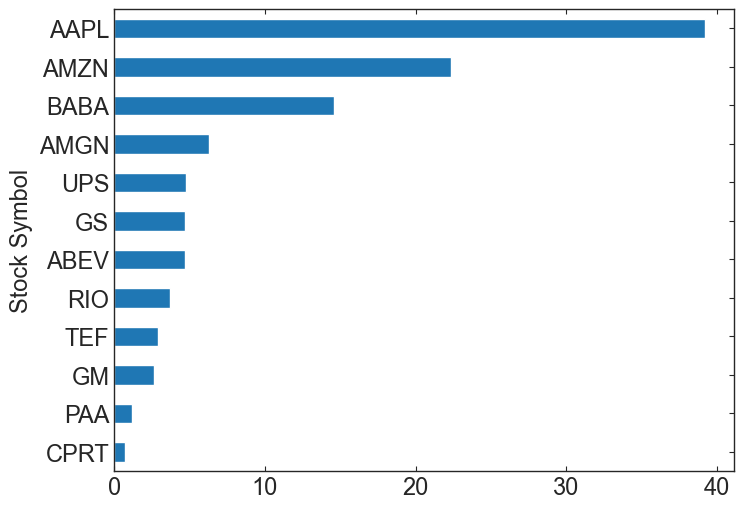

In [72]:
# Calculate and plot the contribution by componen
weights.mul(index_return).sort_values().plot(kind='barh');

Index    107.723386
DJIA      86.722172
dtype: float64


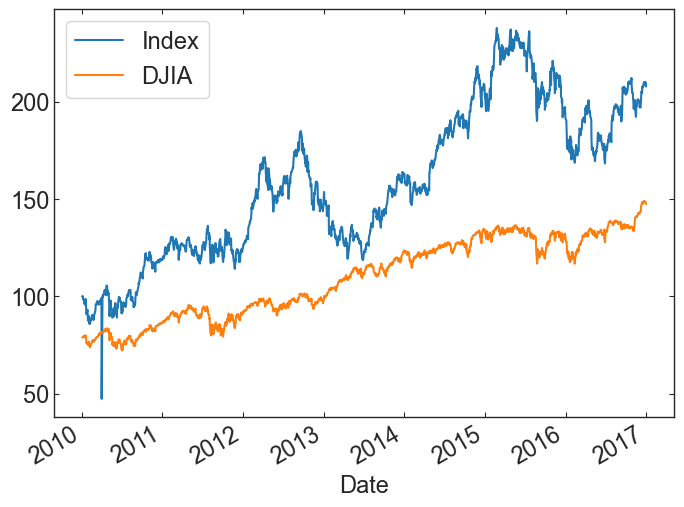

In [73]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print((data.iloc[-1] / data.iloc[0] - 1)*100)

# Plot both series
data.plot();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index       DJIA
Date                             
2010-01-04  100.000000  78.933999
2010-01-05  100.243266  78.844952
2010-01-06   99.356350  78.857332
2010-01-07   98.588689  79.104785
2010-01-08   98.891229  79.189283


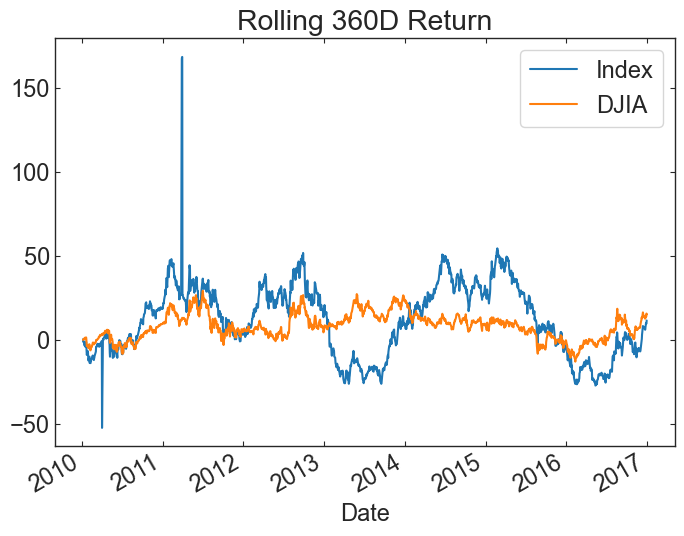

In [74]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r+1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return');

### index correlation

In [75]:
# Inspect stock_prices here
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


In [76]:
# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
correlations

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
AAPL,1.000000,0.286898,0.327611,0.346616,0.306770,0.344981,0.264791,0.391421,0.212960,0.361684,0.325309,0.366039
AMGN,0.286898,1.000000,0.323408,0.355892,0.349893,0.390076,0.336927,0.400230,0.229255,0.313878,0.374555,0.432468
AMZN,0.327611,0.323408,1.000000,0.298929,0.334031,0.333402,0.242726,0.428330,0.182438,0.326229,0.331867,0.378399
CPRT,0.346616,0.355892,0.298929,1.000000,0.371763,0.423160,0.265665,0.401352,0.221273,0.384944,0.376767,0.462716
EL,0.306770,0.349893,0.334031,0.371763,1.000000,0.358318,0.214027,0.431556,0.206056,0.415416,0.428925,0.456952
GS,0.344981,0.390076,0.333402,0.423160,0.358318,1.000000,0.266063,0.466796,0.271982,0.527298,0.498230,0.506407
ILMN,0.264791,0.336927,0.242726,0.265665,0.214027,0.266063,1.000000,0.301392,0.162796,0.234445,0.231173,0.267801
MA,0.391421,0.400230,0.428330,0.401352,0.431556,0.466796,0.301392,1.000000,0.243761,0.437778,0.448438,0.486512
PAA,0.212960,0.229255,0.182438,0.221273,0.206056,0.271982,0.162796,0.243761,1.000000,0.337448,0.253598,0.217523
RIO,0.361684,0.313878,0.326229,0.384944,0.415416,0.527298,0.234445,0.437778,0.337448,1.000000,0.559264,0.509809


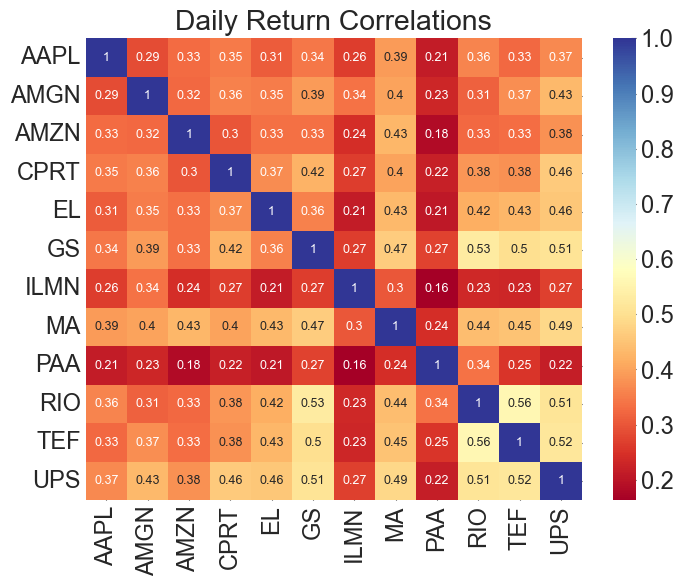

In [77]:
# Plot a heatmap of daily return correlations
ax = sns.heatmap(correlations, annot=True, annot_kws={"size":9}, cmap="RdYlBu")
ax.set(title='Daily Return Correlations');

## Save to Excel

In [78]:
index = index.to_frame(name='Index')

In [79]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [80]:
# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
 12  Index   1762 non-null   float64
dtypes: float64(13)
memory usage: 192.7 KB


In [81]:
# Create index & stock price returns
returns = data.pct_change()

In [82]:
# Export data and data as returns to excel
with pd.ExcelWriter(os.path.join(datadir_pr, 'stock_index_output.xls')) as writer:
    data.to_excel(excel_writer=writer, sheet_name='data')
    returns.to_excel(excel_writer=writer, sheet_name='returns')